In [3]:
import pandas as pd
file = pd.read_excel("./국민신문고(14_220515).xlsx", header=0, usecols="P, T, AH")
file["Column1.content"] = file["Column1.content"].str.replace("\n","") # \n 제거
file

,Column1.title,Column1.content,Column1.dep_name
0,유해화학물질 전 종사자 안전교육,유해화학물질 전 종사자 안전교육 관련 민원 질의 드립니다.,기획운영과
1,유해화학물질 관련 업무 기관들이 너무 불친절하네요.,"작년에 유해화학물질 위반 자진신고 후에 관련 허가를 받기 위해 한강환경유역청 , 화...",기획운영과
2,"㈜우신종합건설의 불공정, 불법공사, 불법 임금체불 문제에 대해(충북 경제자유구역청 귀중)",귀 충북 경제자유구역청의 노고에 감사드립니다.본인은 오송 첨단산업부지 내 화학물질안...,기획운영과
3,신규지정된 유독물질에 대한 설치검사 기한 문의,21년 2월 신규지정된 유독물질을 사용할 경우 설치검사 기한을 문의드립니다.* 당사...,기획운영과
4,유해화학물질 취급자의 개인보호장구 착용에 관한 규정&#x28;화학물질안전원고시 제2...,안녕하세요. 유해화학물질 취급자의 개인보호장구 착용에 관한 규정(화학물질안전원고시 ...,기획운영과
...,...,...,...
5529,화관법] 설치기준 문의,"안녕하세요, 화관법 설치기준 문의드립니다.""액체 유해화학물질 제조사용시설의 바닥둘레...",사고예방심사2과
5530,유해화학물질 취급시설 검사기준 문의&#x28;압력용기용 안전밸브&#x29;,안녕하세요. 압력용기용 안전밸브와 관련하여 유해화학물질 취급시설 검사기준을 질의드리...,사고예방심사2과
5531,제조시설 내에서의 이격거리 및 안전거리 문의건,안녕하십니까? 엔솔엔지니어링㈜ 공정팀의 장세환 차장입니다..저희는 현재 헥사플루오로...,사고예방심사2과
5532,화학물질관리법 검사관련,"당사는 과산화수소 32%를 사용하는 타올및 실을 염색가공하는 업체이며, 화학물질관리...",사고예방심사2과


In [95]:
from nltk import Text
from konlpy.tag import Okt

tokens = []
df1 = pd.DataFrame(columns=['field','word'])

# Open Korea Text 형태소 분석기 
okt = Okt()
# 형태소 추출
for i in range(len(file)): # 임의로 상위 10개 게시글 
    
    title_Text = file.loc[i,'Column1.title'] #제목 추출
    content_Text = file.loc[i,'Column1.content'] #내용 추출
    field = file.loc[i,'Column1.dep_name'] # 과 추출
    
    
    okt_tokens = okt.nouns(title_Text) + okt.nouns(content_Text) # 명사추출
    
    tokens = [okt_tokens for okt_tokens in okt_tokens if len(okt_tokens)>=2] #2글자 이상의 단어만 추출
    
    temp_set = set(tokens) 
    tokens = list(temp_set) # 중복 제거
    
    df2 = pd.DataFrame({'field':field,'word':[tokens]})
    df1 = df1.append(df2)

    
df1

,field,word
0,기획운영과,"[화학물질, 유해, 민원, 안전교육, 질의, 종사, 관련]"
0,기획운영과,"[신고, 주가, 번호, 자진, 회원, 화관, 듯이, 그때, 교육, 자체, 오늘, 장..."
0,기획운영과,"[인력, 건설, 마치, 짐작, 내용증명, 대신, 통해, 공사, 소개, 첨단, 작업,..."
0,기획운영과,"[화학물질, 신고, 일부, 기존, 국립, 시설, 신규, 대한, 기간, 운영, 취급,..."
0,기획운영과,"[화학물질, 착용, 전면, 보호, 대한, 사고, 화학물질안전원, 적합, 무엇, 호흡..."
...,...,...
0,사고예방심사2과,"[화학물질, 외부, 액화, 가스, 시설, 방지, 끓는점, 이하, 상압, 취급, 의무..."
0,사고예방심사2과,"[화학물질, 후속, 전혀, 법정, 실시, 표준, 반응, 협회, 오직, 시설, 위해,..."
0,사고예방심사2과,"[화학물질, 부타디엔, 안녕하십니까, 주택, 생활, 시설, 수행, 종교시설, 운전,..."
0,사고예방심사2과,"[화학물질, 관계, 적용, 여건, 용적, 기존, 위배, 시설, 탱크로리, 역장, 모..."


In [109]:
#과 선택
df = df1.loc[df1['field'] == '기획운영과'] 
df

,field,word
0,기획운영과,"[화학물질, 유해, 민원, 안전교육, 질의, 종사, 관련]"
0,기획운영과,"[신고, 주가, 번호, 자진, 회원, 화관, 듯이, 그때, 교육, 자체, 오늘, 장..."
0,기획운영과,"[인력, 건설, 마치, 짐작, 내용증명, 대신, 통해, 공사, 소개, 첨단, 작업,..."
0,기획운영과,"[화학물질, 신고, 일부, 기존, 국립, 시설, 신규, 대한, 기간, 운영, 취급,..."
0,기획운영과,"[화학물질, 착용, 전면, 보호, 대한, 사고, 화학물질안전원, 적합, 무엇, 호흡..."
0,기획운영과,"[화생방, 상해, 국가, 방지, 조금, 번호, 통해, 소개, 도대체, 대통령, 한국..."


### 단어 빈도 계산

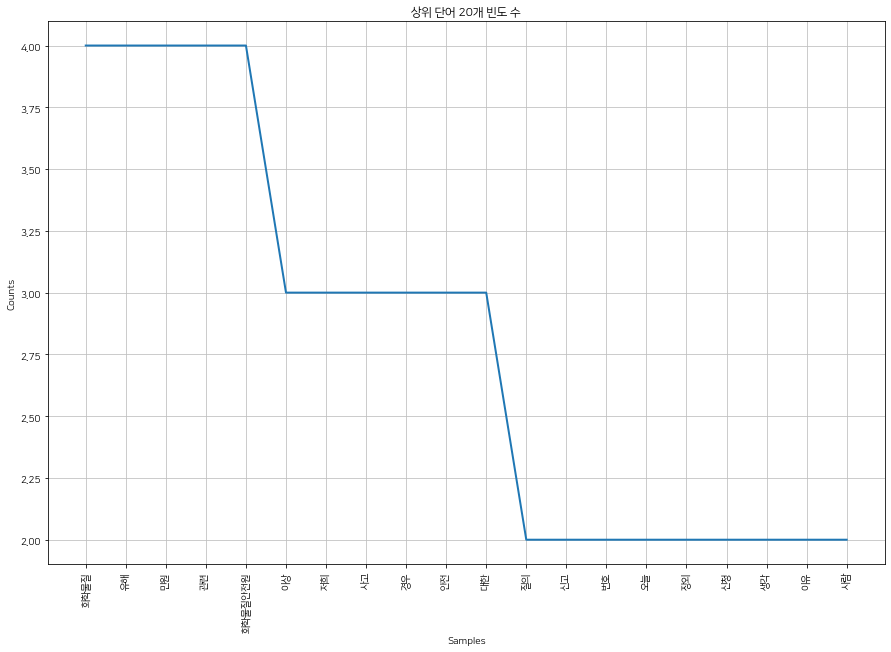

총 고유단어 개수: 319
총 토큰(단어)의 개수 388
최빈 단어-가장 많이 나온 단어: 화학물질
최빈 단어의 빈도수: 4
총토큰수 대비 최빈단어의 비율: 0.010309278350515464


In [127]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 설정


## 해당 과의 단어 빈도 계산
word_list = []
for i in df['word']:
    word_list.extend(i)
    
frequency = Text(word_list, name='단어 빈도 수')
##


font_location = 'C:/WINDOWS/Fonts/NanumSquare.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


plt.figure(figsize=(15,10))
plt.title('상위 단어 20개 빈도 수')
frequency.plot(20) #빈도수 상위 20개 단어를 선그래프로 그린다.

plt.show()

fd_frequency = frequency.vocab()
print('총 고유단어 개수:', fd_frequency.B())
print('총 토큰(단어)의 개수', fd_frequency.N())
print('최빈 단어-가장 많이 나온 단어:', fd_frequency.max())
print('최빈 단어의 빈도수:', fd_frequency.get(fd_frequency.max()))
print('총토큰수 대비 최빈단어의 비율:', fd_frequency.freq(fd_frequency.max()))

In [137]:
# 파일로 출력
frequency_list = fd_frequency.most_common(fd_frequency.B()) 
pd.DataFrame(frequency_list, columns=['word', 'count']).to_csv('./word_frequency.csv', index = False, encoding = "utf-8-sig")

### 단어 상관도 분석

In [119]:
df['word']

0                     [화학물질, 유해, 민원, 안전교육, 질의, 종사, 관련]
0    [신고, 주가, 번호, 자진, 회원, 화관, 듯이, 그때, 교육, 자체, 오늘, 장...
0    [인력, 건설, 마치, 짐작, 내용증명, 대신, 통해, 공사, 소개, 첨단, 작업,...
0    [화학물질, 신고, 일부, 기존, 국립, 시설, 신규, 대한, 기간, 운영, 취급,...
0    [화학물질, 착용, 전면, 보호, 대한, 사고, 화학물질안전원, 적합, 무엇, 호흡...
0    [화생방, 상해, 국가, 방지, 조금, 번호, 통해, 소개, 도대체, 대통령, 한국...
Name: word, dtype: object

In [120]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(y_data)

print(mlb.classes_) # 등장한 모든 단어

['가요' '가입' '가정' '감독' '감사' '개발' '개월' '개인' '개정' '거의' '건설' '검사' '경과' '경우'
 '경호처' '계속' '고시' '고용' '공고' '공공기관' '공급' '공사' '공조' '공통' '과정' '관계' '관련' '관리'
 '관심' '교육' '구매' '구분' '국가' '국립' '국민' '귀중' '귀청' '규격' '규정' '그날' '그냥' '그다음'
 '그때' '근로' '근로자' '기간' '기관' '기도' '기분' '기술' '기술자' '기존' '기한' '나라장터' '나이' '나중'
 '내용' '내용증명' '노고' '노동' '다시' '다용' '달라' '담당자' '답변' '당사' '대국민' '대답' '대상' '대신'
 '대응' '대충' '대통령' '대표' '대한' '대해' '도대체' '도용' '도움' '독촉' '동서' '드릴' '듯이' '등록증'
 '땜빵' '또한' '런가' '로부터' '로서' '마스크' '마치' '말투' '매월' '메탄올' '모두' '모든' '모욕' '목수'
 '무시' '무엇' '문의' '문제' '물질' '물품' '미납' '미만' '민원' '발주' '방독마스크' '방지' '백인' '번은'
 '번호' '별표' '보고' '보호' '보호복' '본인' '부담' '부분' '부서' '부칙' '불공정' '불법' '불합리' '브로'
 '비물질' '사고' '사람' '사실' '사업' '사업자' '사용' '사이트' '사장' '산업부' '산장' '상대방' '상한'
 '상해' '생각' '설명' '설치' '소개' '소방' '수요' '수입' '시기' '시설' '시스템' '시안화수소' '시행' '신고'
 '신규' '신제품' '신청' '신축' '아황산' '안녕하십니까' '안전' '안전교육' '안해' '알칼리' '암모니아' '어차피'
 '억지로' '업무' '업주' '업체' '여러' '역시' '역청' '연결' '연락' '연수' '영업' '영향' '오늘' '오송'
 '요구' '요지부동' '욕설' '운영' '운용' '원자력' '위반' '위해' '위

In [123]:
data = mlb.transform(y_data)
df_data = pd.DataFrame(data,columns=[mlb.classes_])
df_data

,가요,가입,가정,감독,감사,개발,개월,개인,개정,거의,...,화학물질,화학물질안전원,확인,환경,환경과학,환경부,황화수소,회사,회원,훈련
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,1,0
2,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1


In [124]:
# 관계가 1에 가깝다는 것은: 두 단어가 자주 같이 출현한다는 것
# 관계가 -1에 가깝다는 것은: 두 단어가 아주 드물게 출현 혹은 겹치는 영역이 없다는 것
correlation = df_data.corr() #상관계수
correlation

,가요,가입,가정,감독,감사,개발,개월,개인,개정,거의,...,화학물질,화학물질안전원,확인,환경,환경과학,환경부,황화수소,회사,회원,훈련
가요,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.632456,0.316228,-0.2,-0.2,-0.2,1.0,-0.2,1.0,-0.2,1.0
가입,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,1.0,...,0.316228,0.316228,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,1.0,-0.2
가정,-0.2,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,1.0,-0.2,-0.2,...,0.316228,0.316228,-0.2,-0.2,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
감독,-0.2,-0.2,-0.2,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,...,-0.632456,0.316228,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
감사,-0.2,-0.2,-0.2,1.0,1.0,1.0,-0.2,-0.2,-0.2,-0.2,...,-0.632456,0.316228,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
환경부,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.632456,0.316228,-0.2,-0.2,-0.2,1.0,-0.2,1.0,-0.2,1.0
황화수소,-0.2,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,1.0,-0.2,-0.2,...,0.316228,0.316228,-0.2,-0.2,-0.2,-0.2,1.0,-0.2,-0.2,-0.2
회사,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,...,-0.632456,0.316228,-0.2,-0.2,-0.2,1.0,-0.2,1.0,-0.2,1.0
회원,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,1.0,...,0.316228,0.316228,-0.2,1.0,-0.2,-0.2,-0.2,-0.2,1.0,-0.2


In [139]:
correlation.to_csv('./word_correlation.csv', index = True, encoding = "utf-8-sig")

<AxesSubplot:xlabel='None', ylabel='None'>

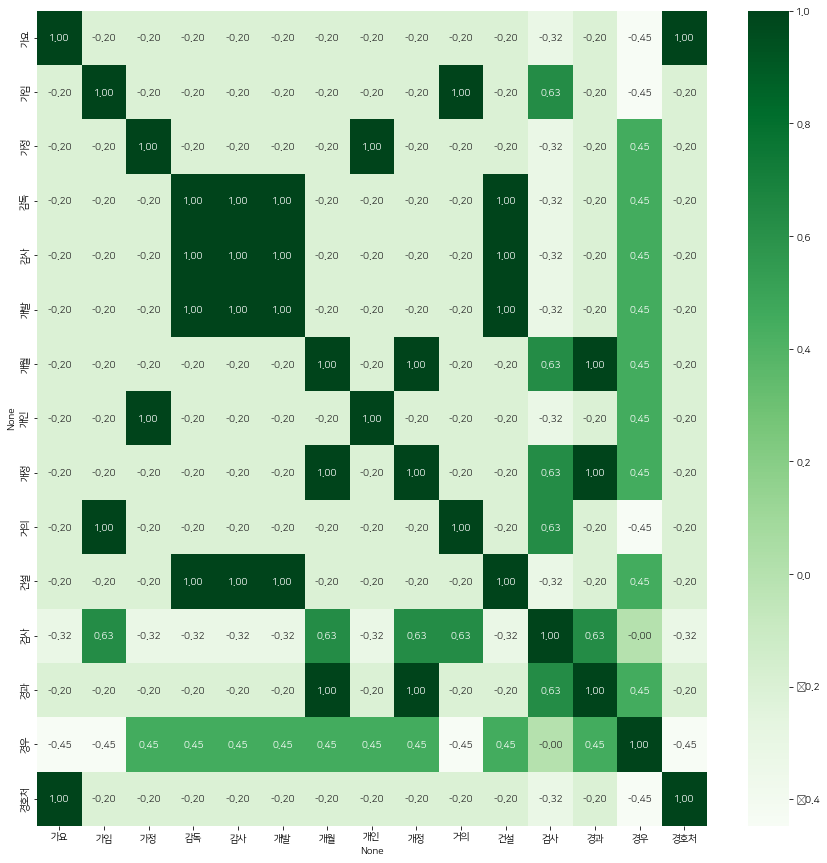

In [165]:
# 10개의 단어 시각화
top = correlation.iloc[0:15,0:15] # 10개 단어 추출

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(top, annot = True, #실제 값 화면에 나타내기
            fmt=".2f",
            cmap = 'Greens', #색상
          )